# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_columns', 200)

# Introduction
In this project we want to answer a few machine learning related questions. The questions are the following : 
* How do ML-algorithms perform when applied to datasets with different levels of dimensionality, and what are the best dimensionality reduction techniques for improving performance in the presence of data challenges?
* How does the choice of regularization techniques (such as L1 or L2 regularization, dropout, or early stopping) impact the extent of overfitting in various types of machine learning models?
* How does the choice of model complexity, such as the number of features, hidden layers, and neurons in a neural network, influence the risk of underfitting in machine learning models, and how can model complexity be optimized to balance the trade-off between underfitting and overfitting?

To do so, we will try to fit data on 3 widely different models (for both classification and regression problems) in term of complexity, and the way each algorithm works. It is important to note that we choose to go with real-life existing datasets and also synthetic datasets.

# The algorithms
In order to answer these questions, we chose to go with 3 different yet interesting algorithms for either classification or regression problems. 
## For classification : 
* Logistic Regression 
* Neural Network 
* RandomForrest 

## For regression : 
* Linear regression
* Neural network
* RandomForrest


### Logistic Regression 
Logistic regression is a statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to a certain class. It is a simple yet powerful algorithm that is widely used in various fields, including machine learning and statistics.

The logistic regression model assumes a linear relationship between the input variables (also known as features or independent variables) and the log-odds of the output variable (also known as the dependent variable or the target class). It is called "logistic" because it uses the logistic function, also known as the sigmoid function, to map the linear combination of inputs to a probability value between 0 and 1. 
Mathematically , it represented as : 

\begin{align}
P(y = \frac{1}{x}) = \frac{1}{1 + e^{-z}}
\end{align}

where p(y = 1 | x) represents the probability of the output variable y being 1 given the input variable x, and z represents the linear combination of the input variables with their respective weights:

\begin{align}
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
\end{align}

In this equation, w0, w1, w2, ..., wn are the weights associated with each input variable, and x1, x2, ..., xn are the values of the corresponding input variables. 
 The goal of logistic regression is to estimate the optimal values for these weights, which are learned from the training data.

### Neural network (Multi Layered Perceptron)
A multi-layer perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected artificial neurons, also known as nodes. It is a feedforward neural network, meaning that information flows through the network from the input layer to the output layer without any loops or feedback connections.

The purpose of an MLP is to learn the optimal weights that minimize a specified loss or error function. This is typically done using backpropagation, which is an algorithm that propagates the error backward through the network, adjusting the weights in each layer based on the error gradient. The weights are updated iteratively using optimization techniques like gradient descent or its variants.

Briefly , here are the main important processes that this architecture is based on:
* Weight Initialization: The weights in an MLP are typically initialized randomly. Let's denote the weight connecting node i in layer l to node j in layer (l+1) as $w_{ij}^{l}$.
* Forward Propagation: Given an input vector x, the outputs of each layer can be computed as follows:


\begin{align}
a_i^l = f(\sum_{(j = 1)}^{N^{l-1}} w_{ij}^{l-1} a_{j}^{(l-1)} + b_{i}^{(l-1)})
\end{align}

* Activation Function: The activation function introduces nonlinearity into the network and is typically denoted as g(). The two most common are sigmoid functions, one being the hyperbolic tangeant $g(v_i) = tanh(v_i)$ and the other being the logistic function $g(v_i) = \frac{1}{1 + e^{-v_i}}$

* Backpropagration : it is used to update the weights in the network based on the calculated error. The error at the output layer can be denoted as $\delta_{i}^{(L)}$ 



## RandomForrest 
Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning family, which combines multiple individual models to make predictions. Random Forest is built upon decision trees and introduces randomness to enhance the model's performance and reduce overfitting.

For both classification and regression models, the RandomForrest algorithm works in 3 main steps: 
* Building trees : creates an ensemble of decision trees. Each decision tree is trained using a random subset of the training data, typically selected through bootstrap sampling.

* Feature Subset Selection: At each node of the decision tree, a random subset of features, denoted as F, is considered for splitting. This subset is typically selected at each tree construction and remains fixed during the entire tree-building process.

* Voting/Averaging ( Classification/Regression) : The final output is either voted independently by each decision tree in classification or averaged in regression. Let's denote the predicted class label of tree t as Ct(x), where x represents the input for classification, whereas for regression it is noted Rt(x).




### The linear regression algorithm 

Linear Regression is a supervised learning algorithm used for predicting a continuous output variable based on one or more input features. It assumes a linear relationship between the input features and the output variable.


\begin{align}
\hat{y}= w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
\end{align}

Here, $\hat{y}$ is the predicted output value, $w_0$ is the y-intercept (bias term). The weights w are a vector noted $\vect{w}$

#   Datasets

## Synthetic dataset

## Real dataset : Spotify Youtube dataset

**Link of the dataset** : https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube?resource=download


 This dataset consists of songs from various artists worldwide, and for each song, it includes several statistics related to the music's presence on Spotify, such as the number of streams. Additionally, it includes the number of views for the official music video of each song on YouTube.

### Content

It includes 26 variables for each of the songs collected from spotify. These variables are briefly described next:

- Track: name of the song, as visible on the Spotify platform.
- Artist: name of the artist.
- Url_spotify: the Url of the artist.
- Album: the album in wich the song is contained on Spotify.
- Album_type: indicates if the song is relesead on Spotify as a single or contained in an album.
- Uri: a spotify link used to find the song through the API.
- Danceability: describes how suitable a track is for dancing based on a combination of musical elements. 
- Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
- Key: the key the track is in. 
- Loudness: the overall loudness of a track in decibels (dB).
- Speechiness: detects the presence of spoken words in a track. 
- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- Liveness: detects the presence of an audience in the recording. 
- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- Tempo: the overall estimated tempo of a track in beats per minute (BPM). 
- Duration_ms: the duration of the track in milliseconds.
- Stream: number of streams of the song on Spotify.

In [37]:
# store our dataset to variable named df
df = pd.read_csv('Spotify_Youtube.csv',  index_col=0)
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


We will see if we have missing values, if there is we will remove them

In [38]:
nan_count = df.isna().sum().sum()
print("Total count of NaN values before:", nan_count)
df.dropna(inplace=True)


nan_count = df.isna().sum().sum()
print("Total count of NaN values now:", nan_count)

Total count of NaN values before: 5404
Total count of NaN values now: 0


The main intention of the dataset is to predict “engagement “ metrics like streams, views, likes and comments based on characteristics of a given song. From the dataset the relevant characteristics are: danceability, energy, key, loudness, speechiness, acousticness, liveness, valence, tempo and duration.

In [3]:
df['index'] = df.index

df_track = df[['index', 'Track']]
df_track.to_csv('s_y_track.csv', index=False)

df_trimmed = df.drop(['Artist', 'Url_spotify', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Description', 'Licensed', 'official_video', 'Channel', 'Track'], axis=1)
df_trimmed.to_csv('s_y_trimmed.csv', index=False)

#   Question 01

# Question 02

# Question 03:
How does the choice of model complexity, such as the **number of features**, **hidden layers**, and **neurons** in a neural network, influence the risk of **underfitting** in machine learning models, and how can model complexity be optimized to balance the trade-off between underfitting and overfitting?

## Definitions

**What is underfitting ?**
Underfitting refers to a situation in machine learning where a model fails to capture the underlying patterns and relationships in the training data. 


It occurs when the model is too simple or lacks the necessary complexity to adequately represent the data. As a result, an underfit model tends to have 
poor predictive performance not only on the training data but also on unseen or test data.

**What are the indicators of underfitting?**
- **Elevated training and test errors** : The model demonstrates significant errors or low accuracy levels on both the training and test datasets.

- **Insufficient learning capacity**: The model encounters difficulties in capturing intricate relationships, thereby possessing limited generalization capabilities towards unseen data.

- **Overly simplistic representations**: The model tends to oversimplify the data, resulting in biased or inaccurate predictions.

Underfitting can occur in various types of machine learning algorithms, including linear regression, decision trees, and neural networks. 

It often happens when the model is too constrained or when there is insufficient training data to capture the true underlying patterns.


## How will we proceed?

In this section, we will investigate how the choice of model complexity influences the risk of underfitting in machine learning models.

To address this, we will conduct a series of experiments to understand the relationship between model complexity and the risk of underfitting and overfitting. 

Our goal is to optimize the model complexity and identify the optimal configuration that strikes a balance between the two.

### Dataset Selection

To address this inquiry and delve into it further, we will utilize an authentic dataset comprising songs from Spotify and YouTube.

Our objective is to forecast the stream count of a song using the following set of features: 

- Danceability: A measure indicating how suitable a track is for dancing based on its musical elements.
- Energy: A numeric value representing the intensity and activity level of a track.
- Key: The musical key in which the track is composed.
- Loudness: The overall loudness of a track measured in decibels (dB).
- Speechiness: A measure detecting the presence of spoken words in a track.
- Acousticness: A confidence measure ranging from 0.0 to 1.0, indicating the level of acoustic elements in a track.
- Instrumentalness: A measure ranging from 0.0 to 1.0, indicating the likelihood of a track being instrumental.
- Liveness: A measure indicating the presence of a live audience in the recording.
- Valence: A value from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- Tempo: The estimated tempo of a track in beats per minute (BPM).
- Duration_ms: The duration of the track in milliseconds.

By utilizing these features, we aim to create a predictive model that can estimate the number of streams a song is likely to receive.

### Data preprocessing

In [39]:
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness','Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
target = 'Stream'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X.head()



,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0


From looking at the data, we can see that the features have significantly different scales. We will need then to normalize our features before applying a machine learning model. We will be using the Min-Max Scaling type of normalization for this case.

In [40]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Scaler=MinMaxScaler()

# Storing the fit object for later reference
ScalerFit=Scaler.fit(X)
# Generating the standardized values of X
x=ScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15336, 11), (3834, 11), (15336,), (3834,))

## Algorithm 01 : Random forest

In this section, we will employ the Random Forest algorithm with different configurations to assess their behavior with respect to underfitting. The following configurations will be utilized:

- Configuration 1: A Random Forest model will be trained using the default number of trees and depth. This configuration serves as the baseline model for comparison.

- Configuration 2: The number of trees in the forest will be increased, and the performance will be evaluated. This will involve adjusting the "n_estimators" parameter to a higher value.

- Configuration 3: The maximum depth of the trees will be increased, and the impact will be analyzed. The "max_depth" parameter will be adjusted to a higher value.

By examining the outcomes of these configurations, we can gain insights into how the Random Forest algorithm responds to different settings and assess their implications in terms of underfitting.

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\ASUS TUF F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R-squared error: 0.037945146196264656
Variance: 1381193446308784.5
Bias: 5.419547833069204e+16


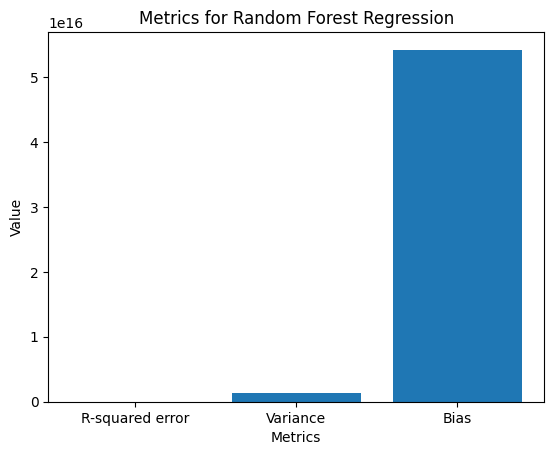

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# Instantiate RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Creating Parameter grid for GridSearch CV
params_rf = {
    'n_estimators': [100],  # Number of trees
    'max_depth': [5],  # Maximum depth of trees
    'min_samples_split': [2],  # Minimum samples required for split
    'min_samples_leaf': [1],  # Minimum samples required at leaf nodes
    'max_features': ['auto']  # Number of features for the best split
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,  # Regressor we want to use
                       param_grid=params_rf,  # Hyperparameter space
                       scoring='neg_mean_squared_error',  # MSE will be performance metric
                       cv=3,  # Number of folds
                       verbose=1,
                       n_jobs=-1)  # Use all available cores

# Fit the model
grid_rf.fit(x_train, y_train)
prediction = grid_rf.predict(x_test)

# Calculate R-squared error, variance, and bias
y_pred = prediction
r2_error = r2_score(y_test, y_pred)
variance = np.var(y_pred)
bias = np.mean((y_test - y_pred) ** 2)

# Print the metrics
print(f"R-squared error: {r2_error}")
print(f"Variance: {variance}")
print(f"Bias: {bias}")

# Plot the metrics
metrics = ['R-squared error', 'Variance', 'Bias']
values = [r2_error, variance, bias]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Metrics for Random Forest Regression')
plt.show()


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\ASUS TUF F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R-squared error: 0.13052669095630176
Variance: 4463364798594337.5
Bias: 4.898007810374388e+16


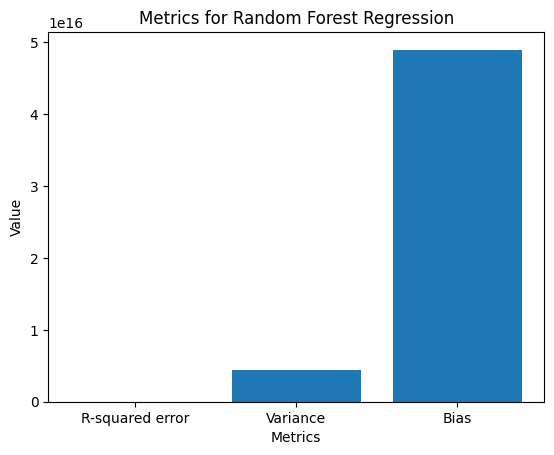

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# Instantiate RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Creating Parameter grid for GridSearch CV
params_rf = {
    'n_estimators': [700],  # Number of trees
    'max_depth': [15],  # Maximum depth of trees
    'min_samples_split': [5],  # Minimum samples required for split
    'min_samples_leaf': [4],  # Minimum samples required at leaf nodes
    'max_features': ['auto']  # Number of features for the best split
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,  # Regressor we want to use
                       param_grid=params_rf,  # Hyperparameter space
                       scoring='neg_mean_squared_error',  # MSE will be performance metric
                       cv=3,  # Number of folds
                       verbose=1,
                       n_jobs=-1)  # Use all available cores

# Fit the model
grid_rf.fit(x_train, y_train)
prediction = grid_rf.predict(x_test)

# Calculate R-squared error, variance, and bias
y_pred = prediction
r2_error = r2_score(y_test, y_pred)
variance = np.var(y_pred)
bias = np.mean((y_test - y_pred) ** 2)

# Print the metrics
print(f"R-squared error: {r2_error}")
print(f"Variance: {variance}")
print(f"Bias: {bias}")

# Plot the metrics
metrics = ['R-squared error', 'Variance', 'Bias']
values = [r2_error, variance, bias]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Metrics for Random Forest Regression')
plt.show()
